In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
df = pd.read_csv('data exports/export-11-2-2020.csv')
df.shape

(196, 11)

In [3]:
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0


In [4]:
df.dtypes

ID                  int64
Date               object
Theme              object
Num_People          int64
Winner_Movie_ID     int64
Voting_Data_ID      int64
People_ID           int64
Name               object
Movie_ID            int64
Title              object
Test                int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

ID                          int64
Date               datetime64[ns]
Theme                      object
Num_People                  int64
Winner_Movie_ID             int64
Voting_Data_ID              int64
People_ID                   int64
Name                       object
Movie_ID                    int64
Title                      object
Test                        int64
dtype: object

## Explore

In [9]:
df.groupby('Name')['ID'].nunique()

Name
Britt     62
CCC        2
JLC        2
Juliet     2
Mike       2
Nico      62
Pato      62
Tian       2
Name: ID, dtype: int64

In [10]:
df['Name'].nunique()

8

In [11]:
df['Name'].unique().tolist()

['Nico', 'Britt', 'Pato', 'Juliet', 'Mike', 'JLC', 'CCC', 'Tian']

#### Add Title column to winning movies

In [12]:
df['Winning_Title'] = df['Winner_Movie_ID'].map(df.groupby('Movie_ID')['Title'].first())
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0,Texas Chainsaw Massacre
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,Texas Chainsaw Massacre
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0,Texas Chainsaw Massacre
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0,Texas Chainsaw Massacre
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,Texas Chainsaw Massacre


In [13]:
winning_movie_counts = df.groupby('Voting_Data_ID')['Winning_Title'].first().reset_index()

In [14]:
winning_movie_counts

,Voting_Data_ID,Winning_Title
0,1,Texas Chainsaw Massacre
1,2,Avengers Endgame
2,3,The Big Short
3,4,Hateful Eight
4,5,Rocky
5,6,Shutter Island
6,7,Heat
7,8,The Lighthouse
8,9,The Hobbit
9,10,22 Jump Street


### Has any film won more than once?

In [15]:
winning_movie_counts.groupby('Winning_Title')['Voting_Data_ID'].nunique()

Winning_Title
22 Jump Street              1
Avengers Endgame            1
Batman (1989)               1
Borat                       1
Dodgeball                   1
Due Date                    1
Harry Potter                1
Hateful Eight               1
Haunt                       1
Heat                        1
Hobbit 2                    1
Inception                   1
Invictus                    1
Jurassic World              1
Justice League: Doom        1
Misery                      1
Narcos & Narcos Mexico      1
Rocky                       1
School of Rock              1
Shutter Island              1
Signs                       1
Talladega Nights            1
Texas Chainsaw Massacre     1
The Big Short               1
The Founder                 1
The Grand Budapest Hotel    1
The Hobbit                  1
The Lighthouse              1
The Purge                   1
The Purge 2                 1
The Purge: Election Year    1
The Wire                    1
Name: Voting_Data_ID, dtyp

#### Add a winning person (winner) column

In [25]:
def winner(row):
    voting_data_id = row['Voting_Data_ID']
    
    winning_title = row['Winning_Title']
    
    winner = df.loc[(df['Voting_Data_ID'] == voting_data_id) & 
                    (df['Title'] == winning_title), 'Name'].values[0]
    
    return winner

In [26]:
df['Winner'] = df.apply(winner, axis=1)

In [27]:
winners = df.groupby('Voting_Data_ID')['Winner'].first().reset_index()

In [29]:
df.loc[df['Winner']=='Britt']

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2,0,Texas Chainsaw Massacre,Britt
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,Texas Chainsaw Massacre,Britt
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,Texas Chainsaw Massacre,0,Texas Chainsaw Massacre,Britt
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers Endgame,0,Texas Chainsaw Massacre,Britt
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,Texas Chainsaw Massacre,Britt
5,6,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,6,2001: A Space Odyssey,0,Texas Chainsaw Massacre,Britt
6,7,2020-08-08 18:11:31,Franchise Movie,3,4,2,2,Britt,4,Avengers Endgame,0,Avengers Endgame,Britt
7,8,2020-08-08 18:11:31,Franchise Movie,3,4,2,1,Nico,7,Die Hard 4,0,Avengers Endgame,Britt
8,9,2020-08-08 18:11:31,Franchise Movie,3,4,2,1,Nico,8,Matrix Revolutions,0,Avengers Endgame,Britt
9,10,2020-08-08 18:11:31,Franchise Movie,3,4,2,2,Britt,9,Toy Story 4,0,Avengers Endgame,Britt


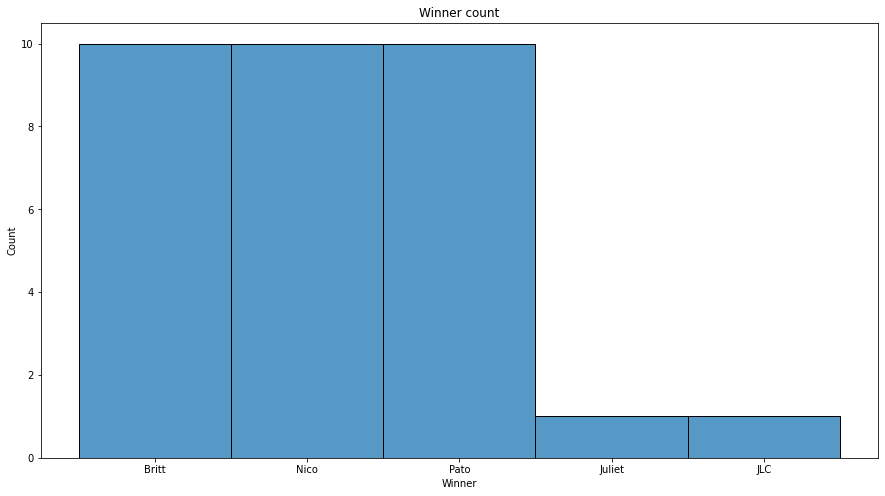

In [30]:
plt.figure(figsize = (15,8))


sns.histplot(x = 'Winner',
             data = winners)

plt.title('Winner count')

plt.show()

In [ ]:
plt.figure(figsize = (15,8))


sns.histplot(x = 'Date'
             y = '',
             
             data = winners)

plt.title('Winner count')

plt.show()

### Let's look at the Movies

In [ ]:
df.head()

In [ ]:
df.groupby('Title')['ID'].nunique().sort_values(ascending=False)

In [ ]:
df.loc[df['Theme'].isnull()]

In [ ]:
df.loc[df['Theme'].isnull(), 'Theme'] = 'Weekday TV Show'

In [ ]:
df.loc[df['Name'] == 'Pato', 'Title'].unique().tolist()